---

<h1><center>P R O J E C T</center></h1>

---

Click on  below link to download dataset: <br>
[Dataset link](https://info.stackoverflowsolutions.com/rs/719-EMH-566/images/stack-overflow-developer-survey-2022.zip)


---
### importing libraries

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

---
### reading dataset

In [10]:
survey_df = pd.read_csv('sods2022/survey_results_public.csv')

In [11]:
schema_df = pd.read_csv('sods2022/survey_results_schema.csv')

---
###  preprocessing

In [12]:
schema_df.head()

,qid,qname,question,force_resp,type,selector
0,QID16,S0,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
1,QID12,MetaInfo,Browser Meta Info,False,Meta,Browser
2,QID1,S1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
3,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
4,QID296,Employment,Which of the following best describes your cur...,False,MC,MAVR


---
we need column _qname_ as index of `schema_df` DataFrame

In [13]:
schema_df.set_index('qname', inplace=True)

---
  only data in _question_ column is useful, so we will delete other columns

In [14]:
schema_df = schema_df.question

---
After deletion

In [15]:
schema_df

qname
S0             <div><span style="font-size:19px;"><strong>Hel...
MetaInfo                                       Browser Meta Info
S1             <span style="font-size:22px; font-family: aria...
MainBranch     Which of the following options best describes ...
Employment     Which of the following best describes your cur...
                                     ...                        
Frequency_2    Interacting with people outside of your immedi...
Frequency_3    Encountering knowledge silos (where one indivi...
TrueFalse_1    Are you involved in supporting new hires durin...
TrueFalse_2    Do you use learning resources provided by your...
TrueFalse_3    Does your employer give you time to learn new ...
Name: question, Length: 79, dtype: object

### plot function

In [18]:
def custom_plot(series, plot_height=15, plot_width=5, 
                y_label_font_size=13.5, 
                title = '', title_font_size=15,
                percent_font_size=14,
                color = 'light:#59C1BD'):
       
    # create figure to display plot
    plt.figure(figsize=(plot_width, plot_height))
    
    # to hide square of the plot 
    custom_params = {
                        "axes.spines.bottom": False, 
                        "axes.spines.right": False,
                        "axes.spines.left"  : False, 
                        "axes.spines.top": False 
                    }

    
    sns.set_theme(style="white", rc=custom_params)
    
    # creating different shades of colors(color palette) of size series length
    # pal stores rgb values for different color shades 
    pal = sns.color_palette(color, len(series)) # light:#5A9
    
    # argsort return indices of elements according to sorting order..
    # means lowest number will be indexed as 0, and so on
    # rank stores rank of series whr highest count value comes first
    # using this rank to assign color shades to diffrnt bars in plot
    rank = series.argsort().argsort()
    
    ax = sns.barplot(x = series.values, y=series.index, 
                     #palette='PuBuGn_r'
                     #order=series.sort_values('Growth').State,
                     palette=np.array(pal[::])[rank]
                    )

    # to calculate percentage
    s = series.values.sum()

    for rect in ax.patches:
        x_value = rect.get_width()
        y_value = (rect.get_y() + rect.get_height() / 2)
        space = 0

        # calculating percentage and assigning to variable label
        label = "{:.2f}%".format( (100*x_value/s))

        # to display percentage value on bar
        plt.annotate(
            text=label,                    # Use `label` as label
            xy=((x_value/2)-5, y_value),   # Place label at end of the bar, xy argument..maybe coordinate
            xytext=(space, 0),          # Horizontally shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            va='center',                # Vertically center label
            color = 'white', 
            #ha='center',
            weight='bold', size=percent_font_size
        ) 

    plt.title('\n'+title+'\n', 
              fontdict=
              {
                  "color": 'black',
                  "weight":'bold',  
                  "size":title_font_size
              }
             )
    
    
    plt.yticks(size=y_label_font_size)#, weight='bold')
    plt.xticks([], []) # to hide xticks
    
    f_dict={"color": 'black',"weight":'bold',  "size":15}
    plt.figtext(.74, .042, "Total Responses: {}".format(s), 
                fontdict = f_dict);

---
---

## what is your main branch..?

In [40]:
def MainBranch_ylabel_text_process(s):
    if s == 'I am not primarily a developer, but I write code sometimes as part of my work':
        return 'Not developer, write\n code as part of work'
    elif s == 'I used to be a developer by profession, but no longer am':
        return 'developer by profession\n but no longer'
    elif s == 'I am a developer by profession':
        return 'I am a developer\n by profession'
    elif s == 'I code primarily as a hobby':
        return 'I code primarily\n as a hobby'
    else:
        return s

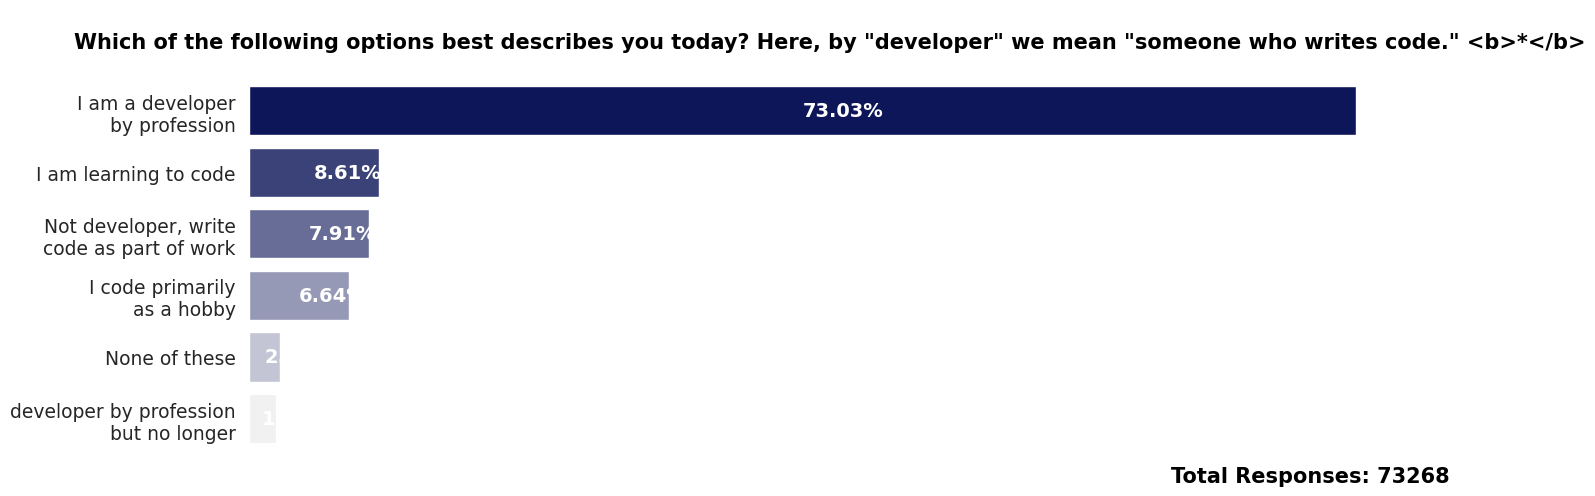

In [59]:
survey_df['MainBranch'] = survey_df.MainBranch.apply(MainBranch_ylabel_text_process, ) 

mb = survey_df.MainBranch.value_counts()

custom_plot(
            mb, 
            plot_width=15, plot_height=4.8, 
            y_label_font_size=13.5,
            title = schema_df.MainBranch,
            color = 'light:#000C66'
            )


---
## How old is the average professional developer..?

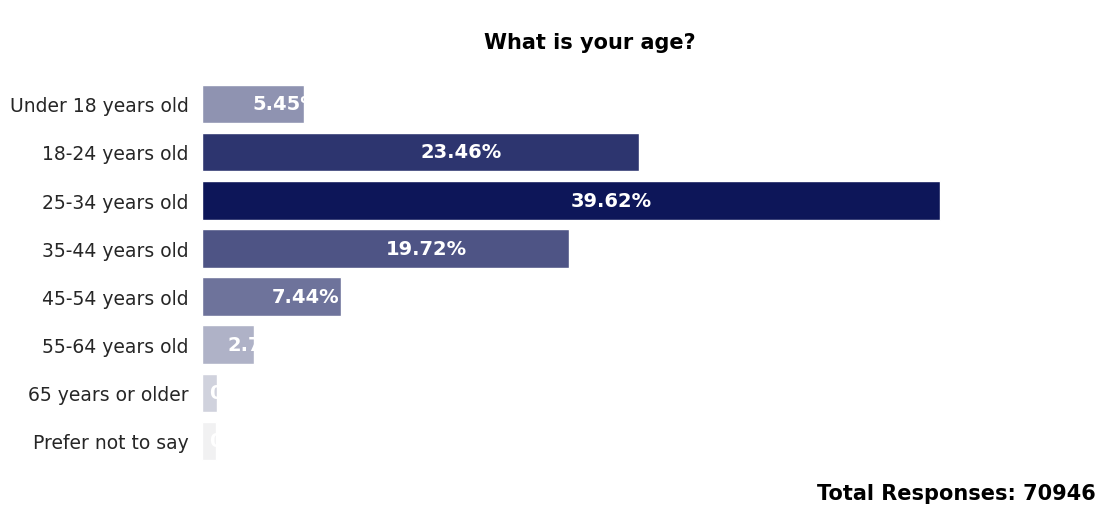

In [134]:
# Age

reorder_list = ['Under 18 years old', '18-24 years old',
               '25-34 years old', '35-44 years old', 
                '45-54 years old', '55-64 years old', 
                '65 years or older', 'Prefer not to say']

age_data = survey_df.Age.value_counts().reindex(reorder_list)

custom_plot(age_data, plot_height=5, color='light:#000C66',
           title = schema_df.Age, plot_width=10)

---
## Employment status of an employee

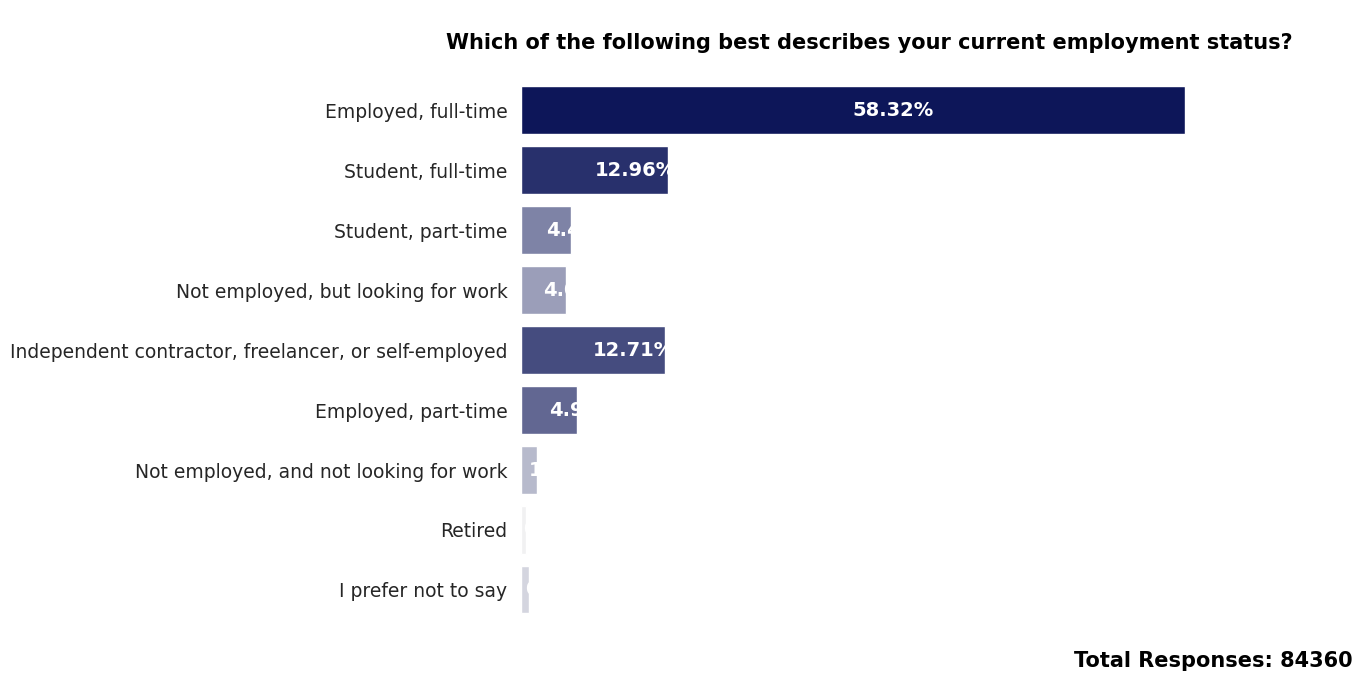

In [21]:
# Employment

def colum_expand( s ):
    d = {}
    
    for t in s.dropna().values:
        for i in t.split(';'):
            if i in d.keys():
                d[i] += 1
            else:
                d[i] = 1
    
    return pd.Series(d)
        

emp = colum_expand(survey_df.Employment)

custom_plot(emp, plot_height=7, color='light:#000C66',
           title=schema_df.Employment, plot_width=9)

---
## mode of working of employee(remote/hybrid)

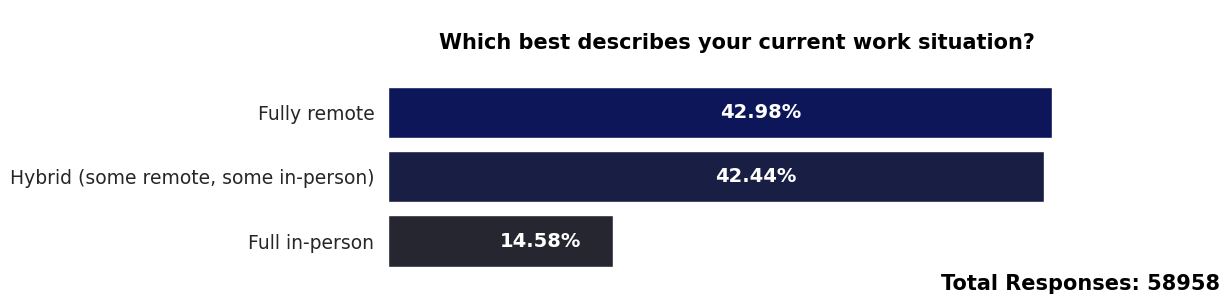

In [19]:
# RemoteWork

remote_work = survey_df.RemoteWork.value_counts()

custom_plot(remote_work, plot_height=2.5, plot_width=9
           , color='dark:#000C66', title=schema_df.RemoteWork)

---
---

## how many of you write code outside of your work

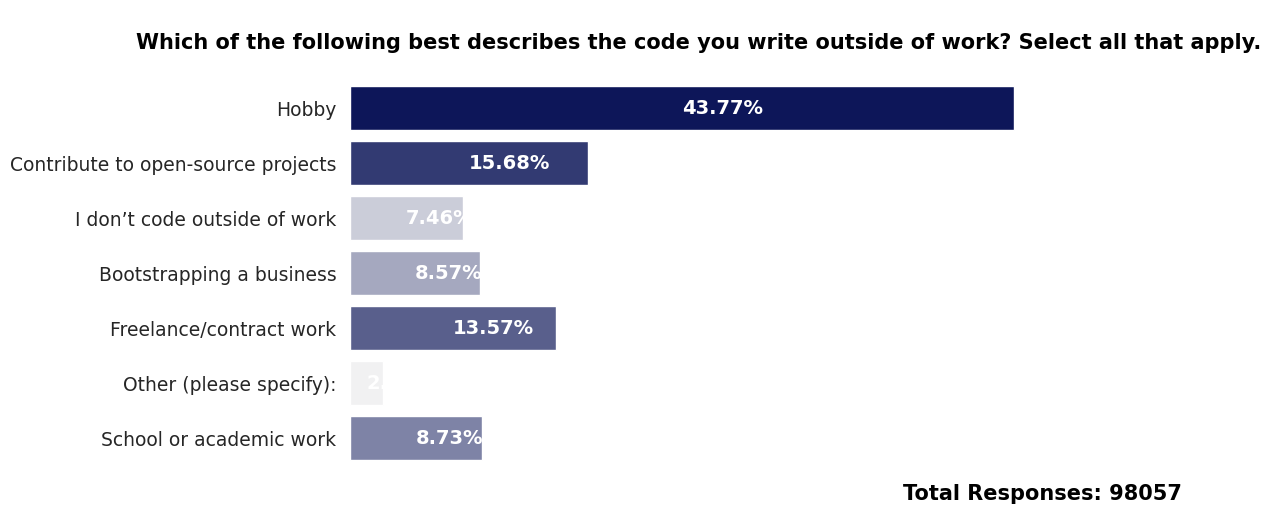

In [164]:
# CodingActivities

coding_act = colum_expand(survey_df.CodingActivities)

custom_plot(coding_act, plot_height=5, plot_width=9, 
            color='light:#000C66', title=schema_df.CodingActivities)

---
---

## What is your highest level of formal education..?

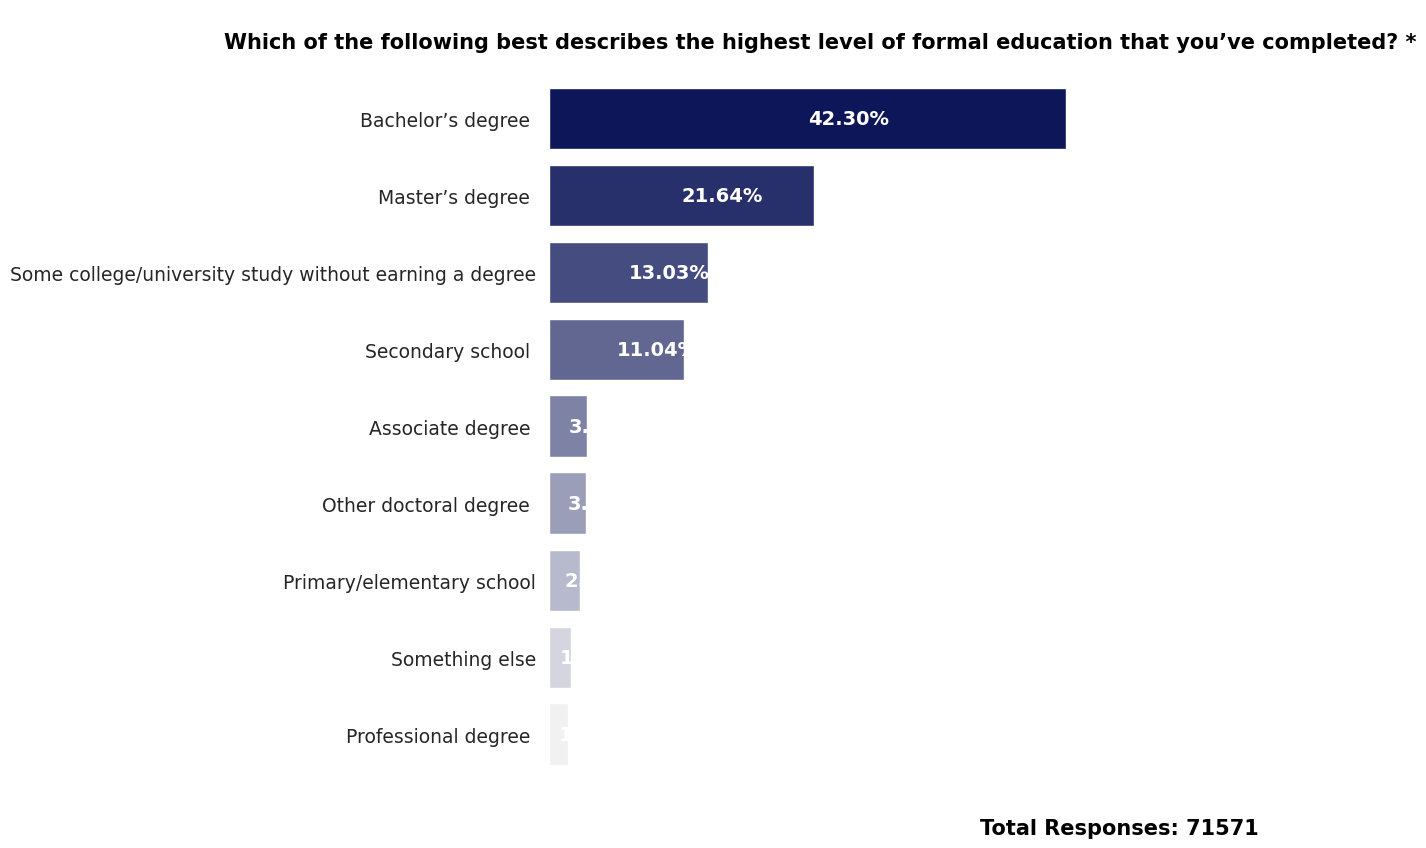

In [172]:
edu = survey_df.EdLevel.value_counts()

custom_plot(edu, plot_height=9, plot_width=7, color='light:#000C66',
           title=schema_df.EdLevel)

---
---

## How did you learn to code

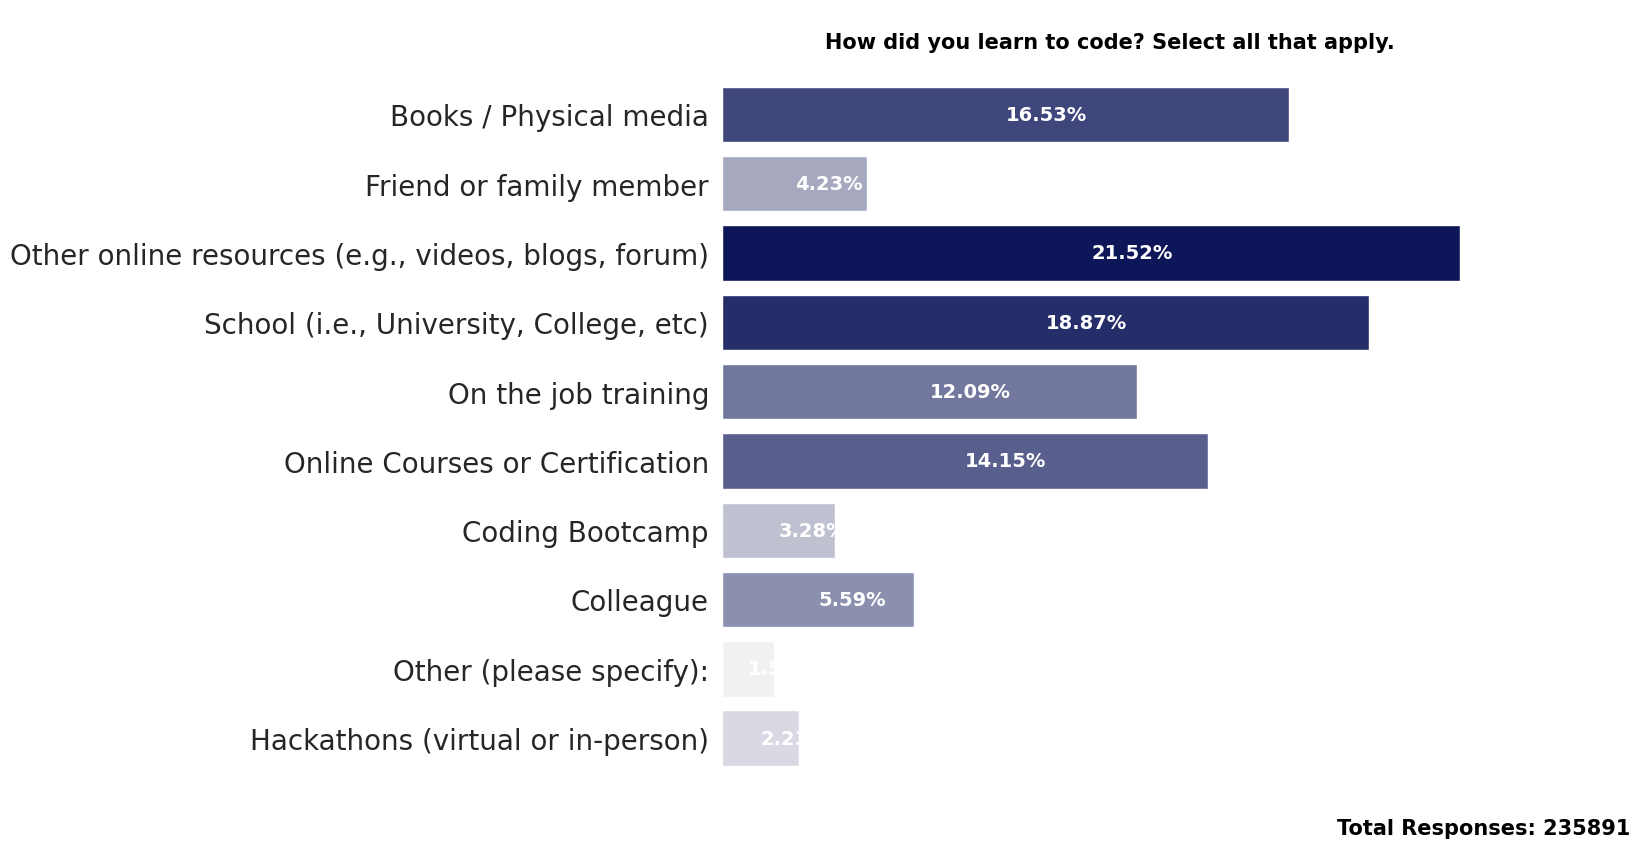

In [186]:
# LearnCode

learn_code_data = colum_expand(survey_df.LearnCode)


custom_plot(learn_code_data, plot_height=9, plot_width=10,
           color='light:#000C66', title=schema_df.LearnCode,
           y_label_font_size=20)

---
## What online resources do you use to learn to code?

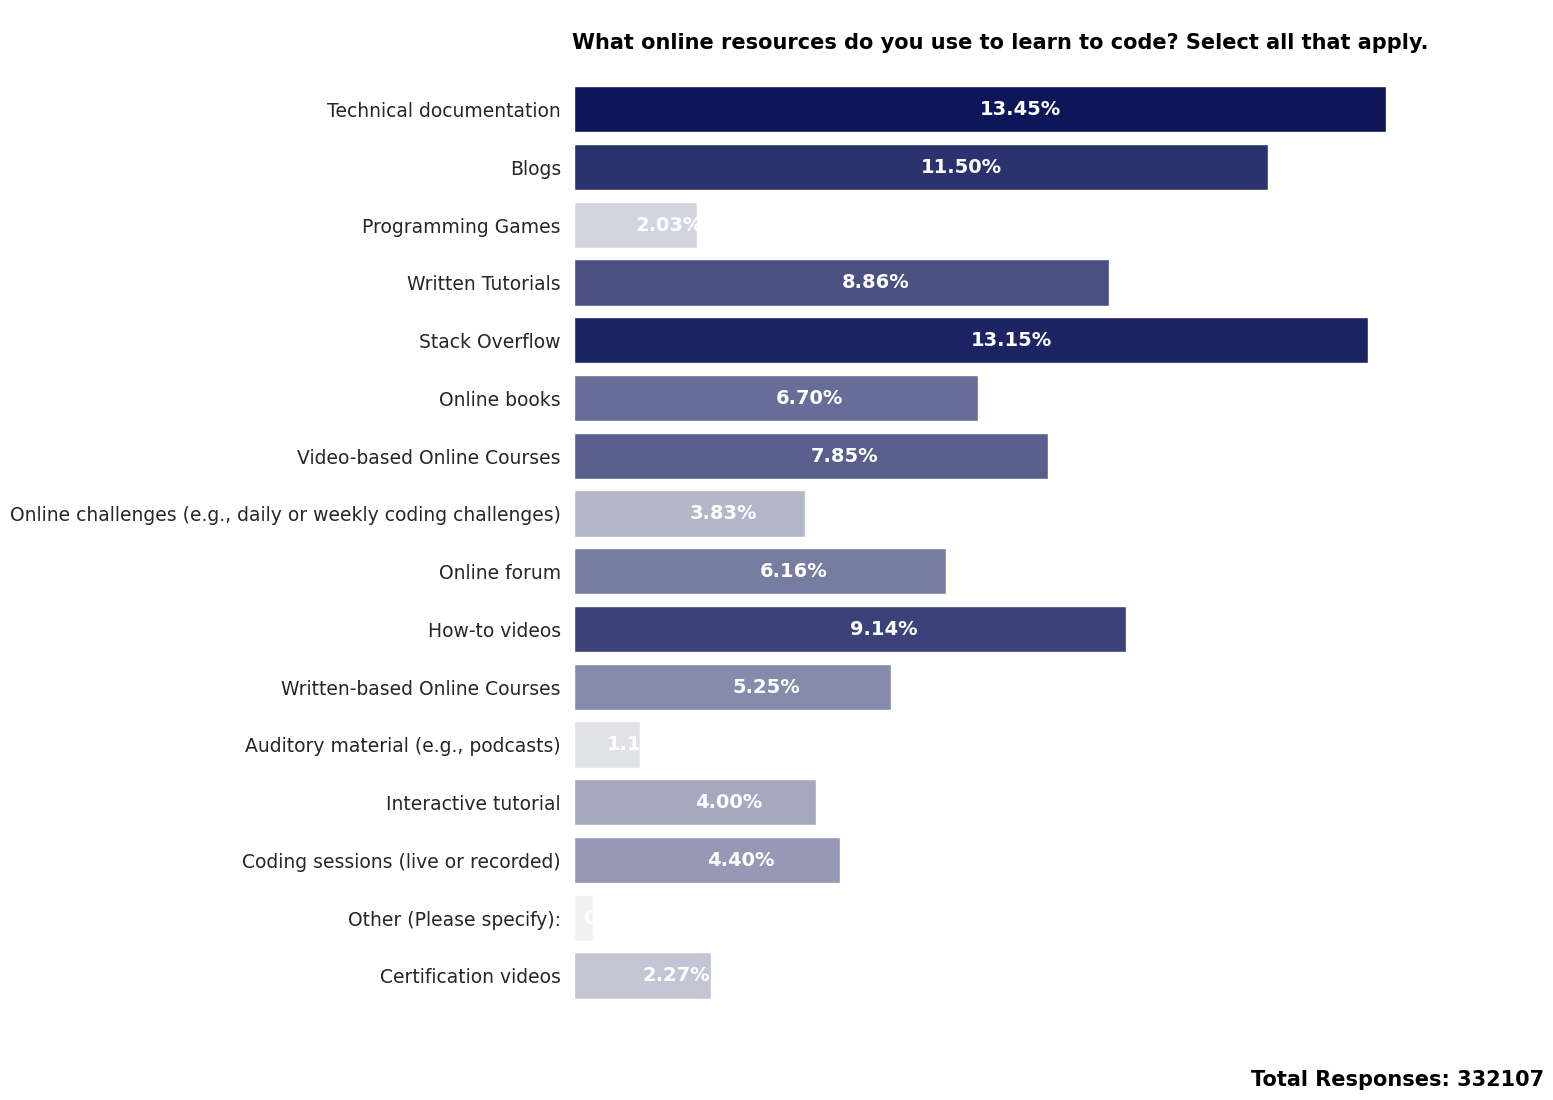

In [195]:
# LearnCodeOnline
learn_code_online = colum_expand(survey_df.LearnCodeOnline)


custom_plot(learn_code_online, plot_height=12, plot_width=11,
           color='light:#000C66', title=schema_df.LearnCodeOnline)

---
---

### What online courses or certifications do you use to learn to code?

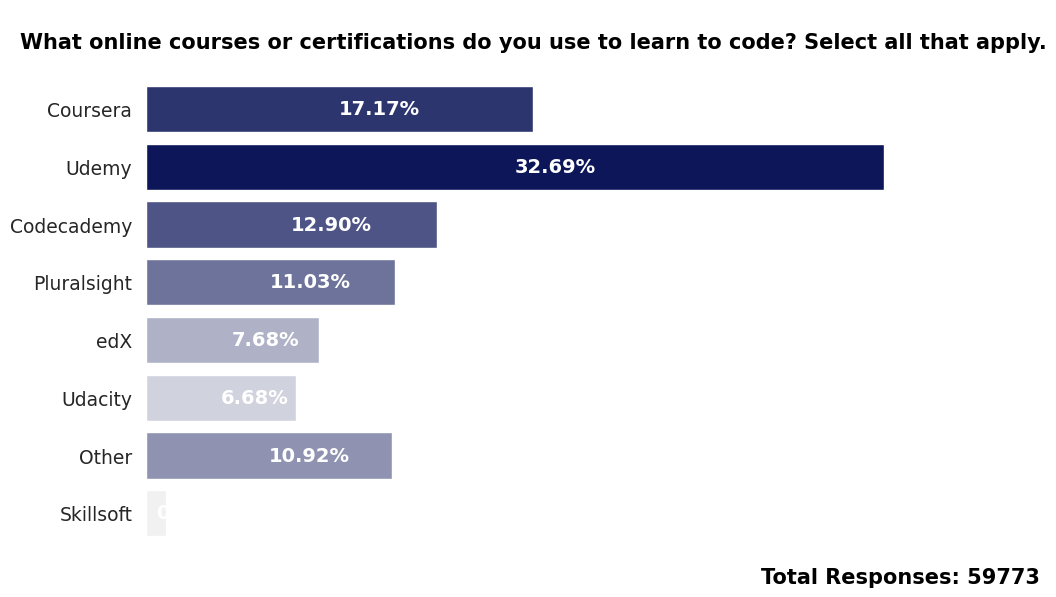

In [205]:
learn_code_cert = colum_expand(survey_df.LearnCodeCoursesCert)

custom_plot(learn_code_cert, plot_height=6, plot_width=10, 
           color='light:#000C66', title=schema_df.LearnCodeCoursesCert)

---
---

### how many years have you been coding in total (Including education)

In [27]:
def make_groups(s):
    try:
        s = int(s)
        if s > 0 and s < 5:
            return '0 to 5 years'
        if s > 5 and s < 10:
            return '5 to 10 years'
        if s > 10 and s < 15:
            return '10 to 15 years'
        if s > 15 and s < 20:
            return '15 to 20 years'
        if s > 20 and s < 25:
            return '20 to 25 years'
        if s > 25 and s < 30:
            return '25 to 30 years'
        if s > 30 and s < 35:
            return '30 to 35 years'
        if s > 35 and s < 40:
            return '35 to 40 years'
        if s > 40 and s < 45:
            return '40 to 45 years'
        if s > 45 and s < 50:
            return '5 to 10 years'
    except (TypeError, ValueError):
        pass
    

In [226]:
survey_df['coding_experience'] = survey_df.YearsCode.apply(make_groups)

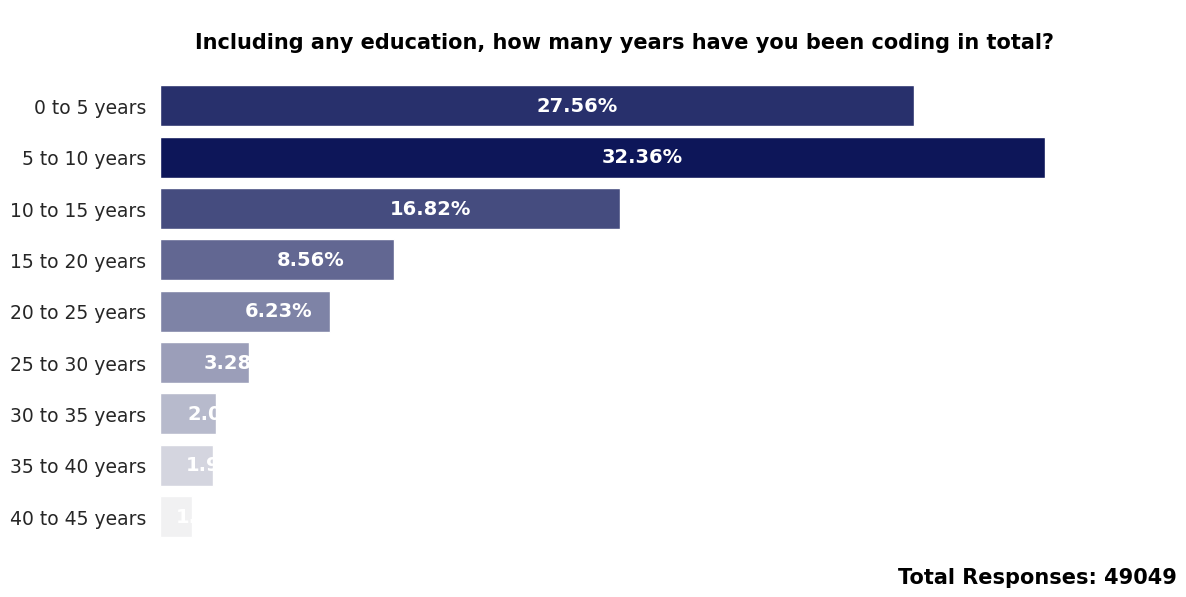

In [238]:

reorder_list = ['0 to 5 years', '5 to 10 years', '10 to 15 years',
               '15 to 20 years', '20 to 25 years', '25 to 30 years',
               '30 to 35 years','35 to 40 years', '40 to 45 years']

ce = survey_df.coding_experience.value_counts().reindex(reorder_list)

custom_plot(ce, plot_height=6, plot_width=12, 
            title=schema_df.YearsCode, color='light:#000C66')

---
---

### how many years have you been coding in total ( not Including education)

In [244]:
survey_df['prof_code_exp'] = survey_df.YearsCodePro.dropna().apply(make_groups)

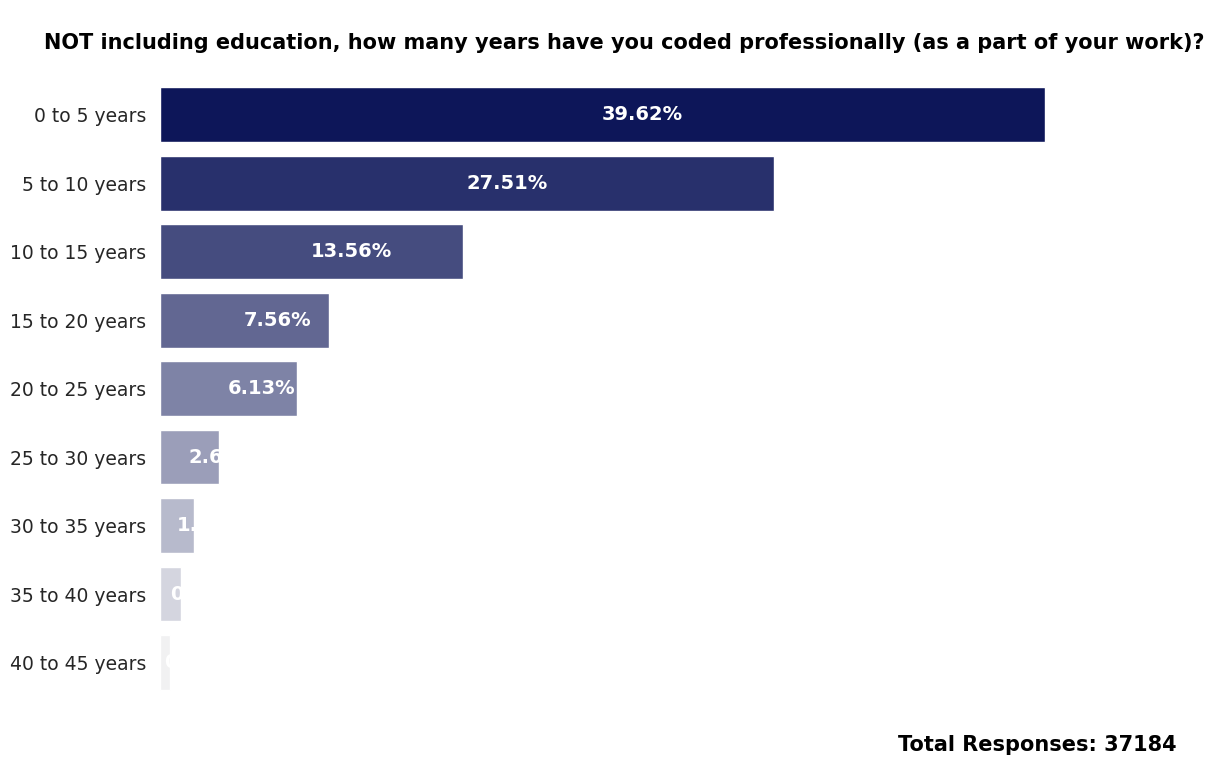

In [253]:
pce = survey_df.prof_code_exp.value_counts()

custom_plot(pce, plot_height=8,plot_width=12,
           title=schema_df.YearsCodePro, color='light:#000C66')

---
---

### what kind of developer you are..?

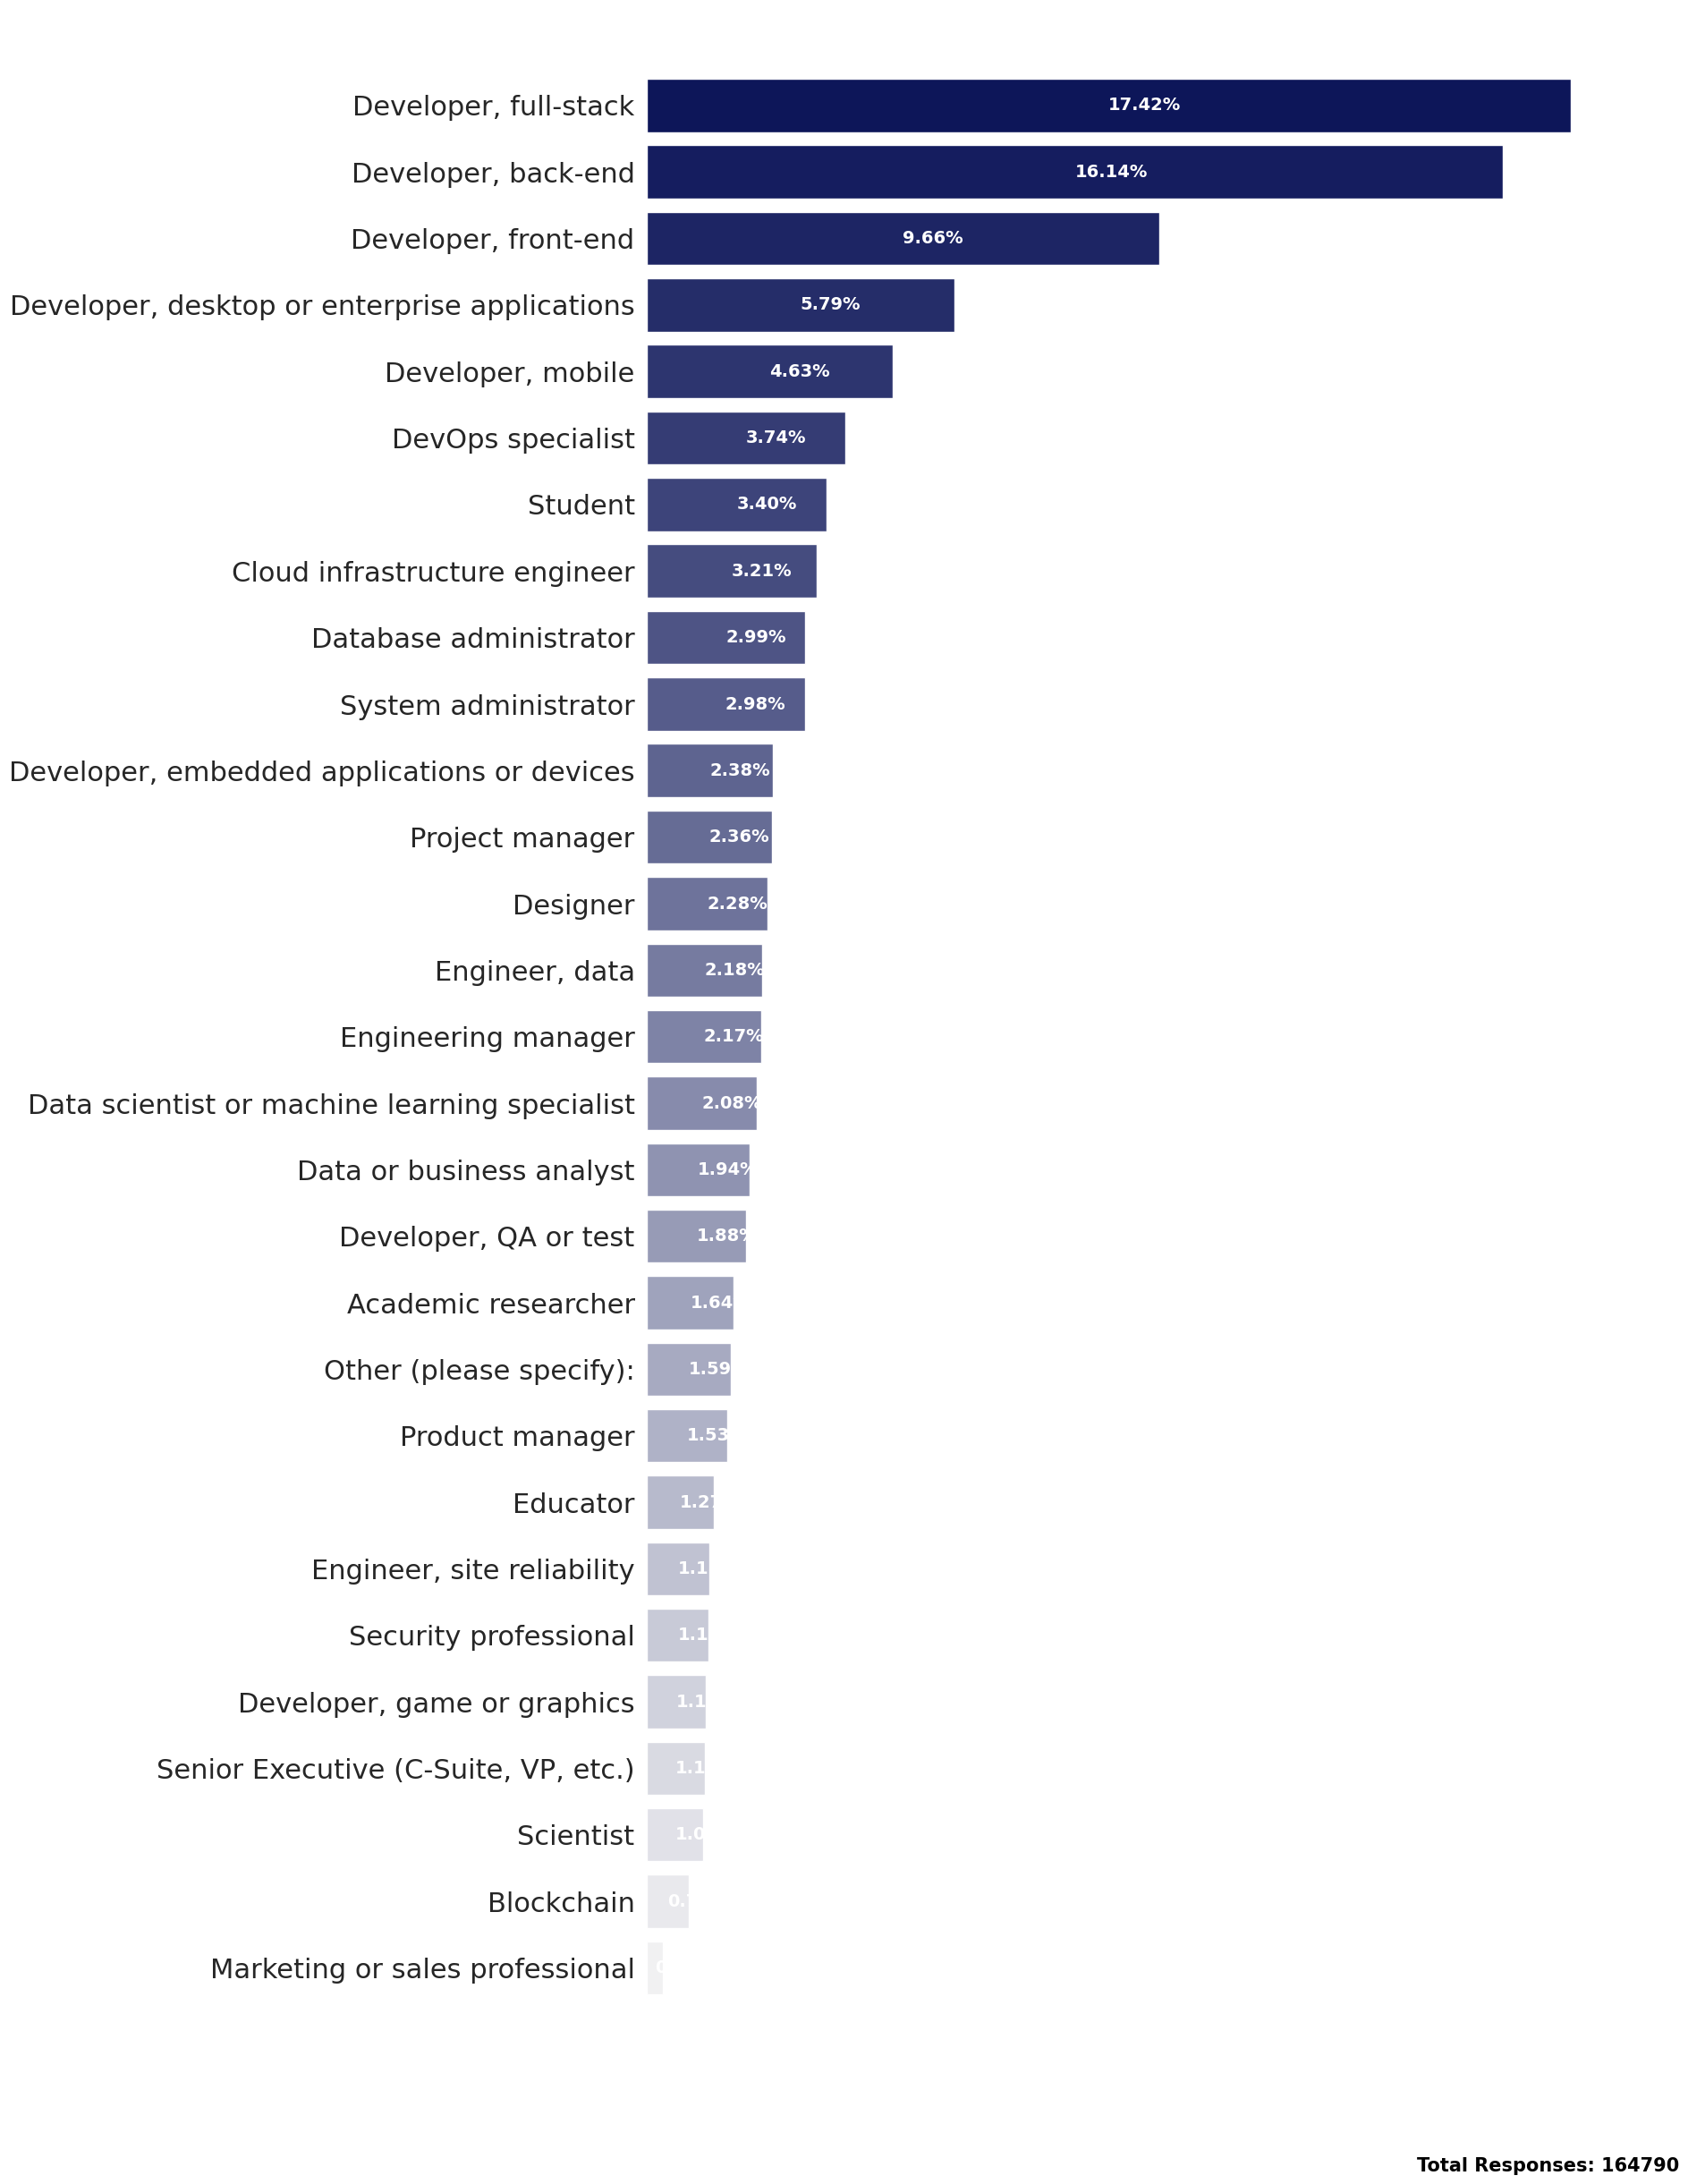

In [269]:
dev_type = colum_expand(survey_df.DevType)

dev_type = dev_type.sort_values(ascending=False)

custom_plot(dev_type, color='light:#000C66', plot_height=28,
           plot_width=14, y_label_font_size=22)

---
---

## what is organization size of the developer...?

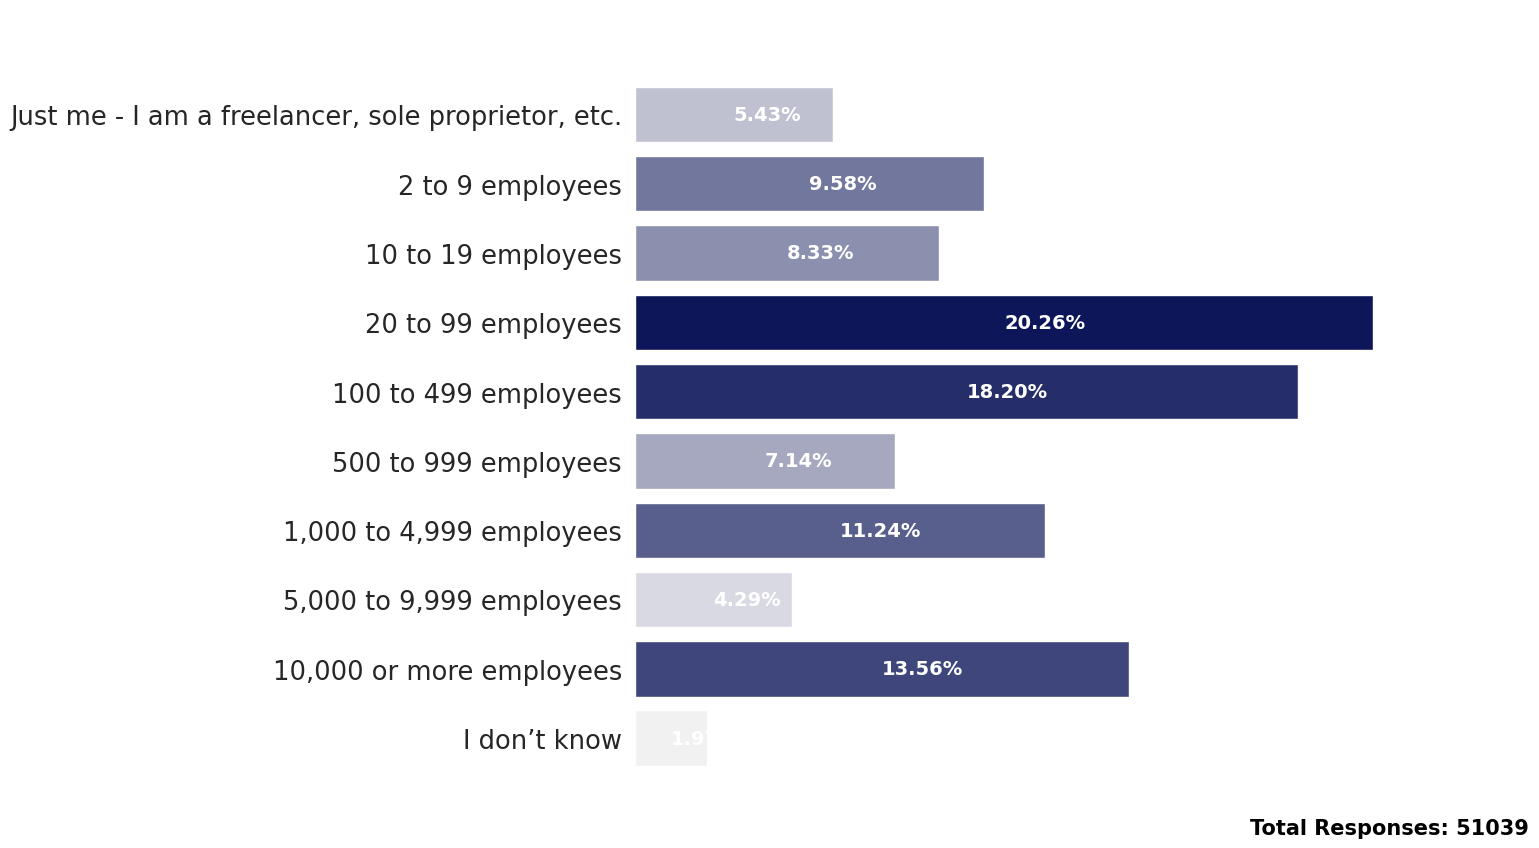

In [13]:
reorder_list = [
    "Just me - I am a freelancer, sole proprietor, etc.",
    "2 to 9 employees", "10 to 19 employees", "20 to 99 employees", 
    "100 to 499 employees", "500 to 999 employees", 
    "1,000 to 4,999 employees", "5,000 to 9,999 employees",
    "10,000 or more employees", "I don’t know"           
]
                                                    
org_size = survey_df.OrgSize.value_counts().reindex(reorder_list)

custom_plot(org_size,plot_height=9, plot_width=10,
           color = 'light:#000C66',
           y_label_font_size=18.5)

---
---

### What level of influence developer, have over new technology purchases at your organization?

In [23]:
def plot_pie(data , title='', distance_btwn_pieces=0.09, startangle=-11):
    a=distance_btwn_pieces       
    explode = (a,) * len(data)
    
    plt.figure(figsize=(14,10))
    
    patches, texts, pcts = plt.pie(data, explode=explode,  
                                   labels=data.index,  
            #labeldistance=1.1,
            pctdistance=0.65,
            colors = ['red', 'blue', 'yellow','pink','blue'],
            
            #wedgeprops={'linewidth': 1.5, 'edgecolor' : "green" }, 
            textprops={"weight":'bold', "size":20, 'family':'serif'}, 
            autopct='%1.1f%%',
            startangle=startangle,
            shadow=True,
           )


    plt.setp(pcts, color='black')
    hfont = {'fontname': 'serif', 'weight': 'bold'}
    plt.title(title, size=25, **hfont)
    centre_circle = plt.Circle((-0.08,0), 0.5, fc='white')
    fig = plt.gcf() # get current figure
    fig.gca().add_artist(centre_circle)
    ;

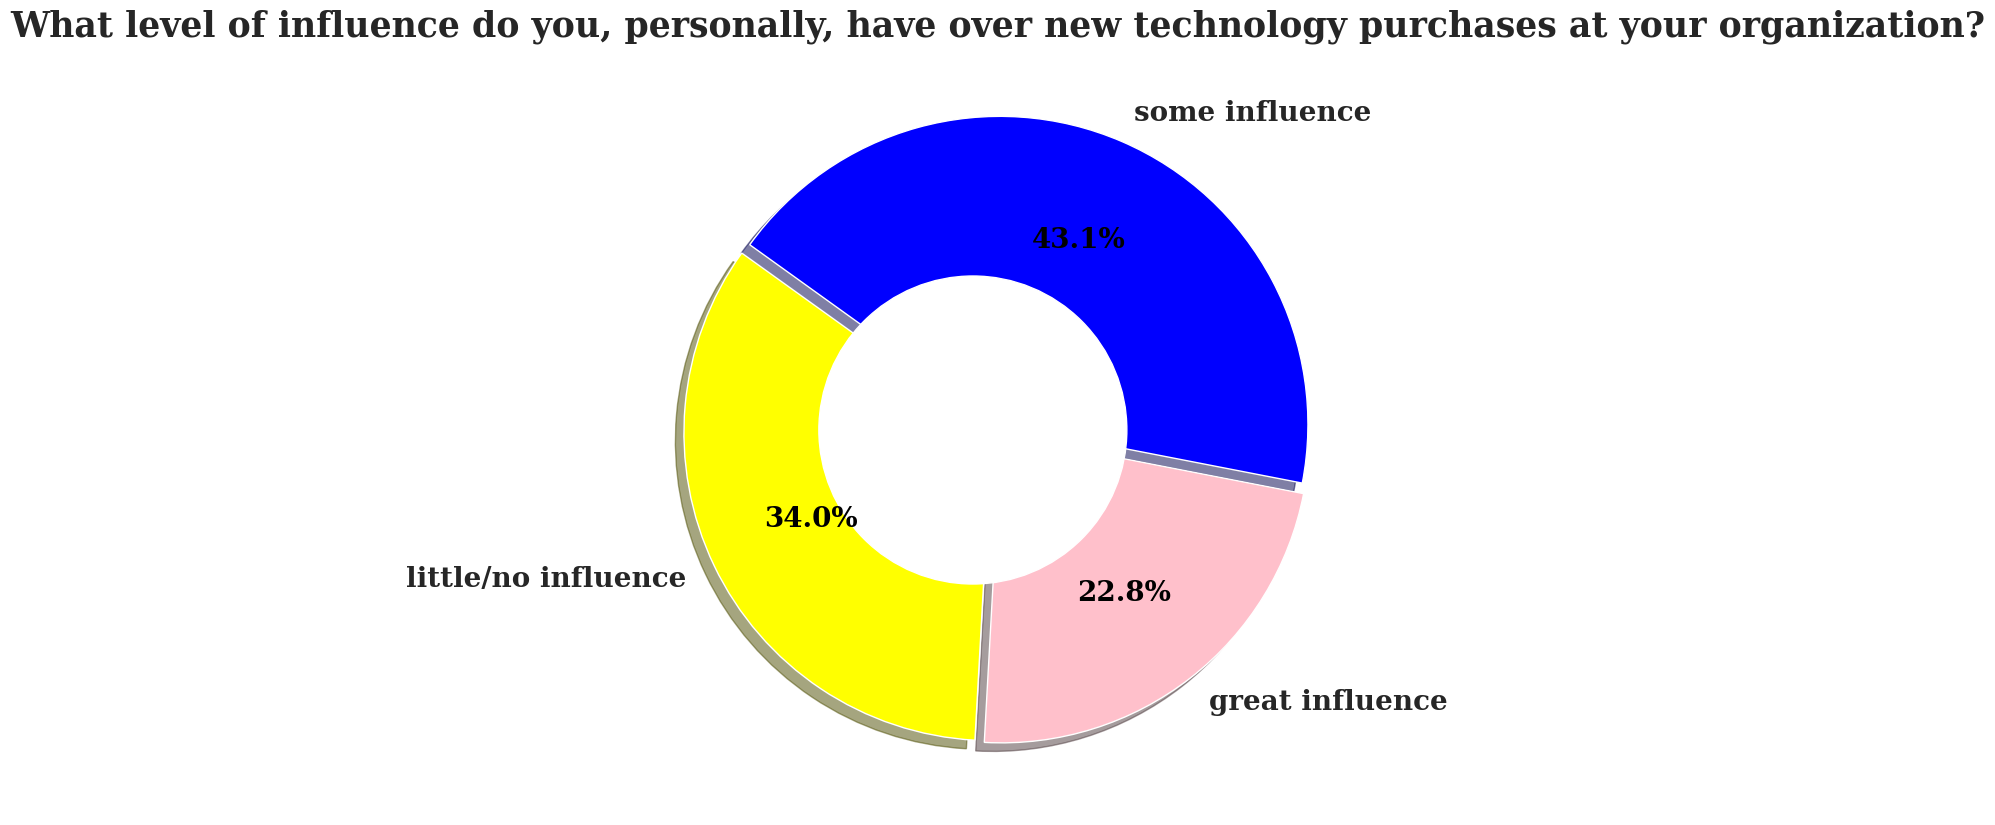

In [37]:
def shorten_names(s):
    if s == 'I have some influence':
        return 'some influence'
    elif s == 'I have little or no influence':
        return 'little/no influence'
    elif s == 'I have a great deal of influence':
        return 'great influence'

tech_influence = survey_df.PurchaseInfluence.apply(shorten_names)
tech_influence = tech_influence.value_counts()

plot_pie(data=tech_influence, 
         title = schema_df.PurchaseInfluence,
         distance_btwn_pieces=0.02
        )

---
---

### Where do developer live?

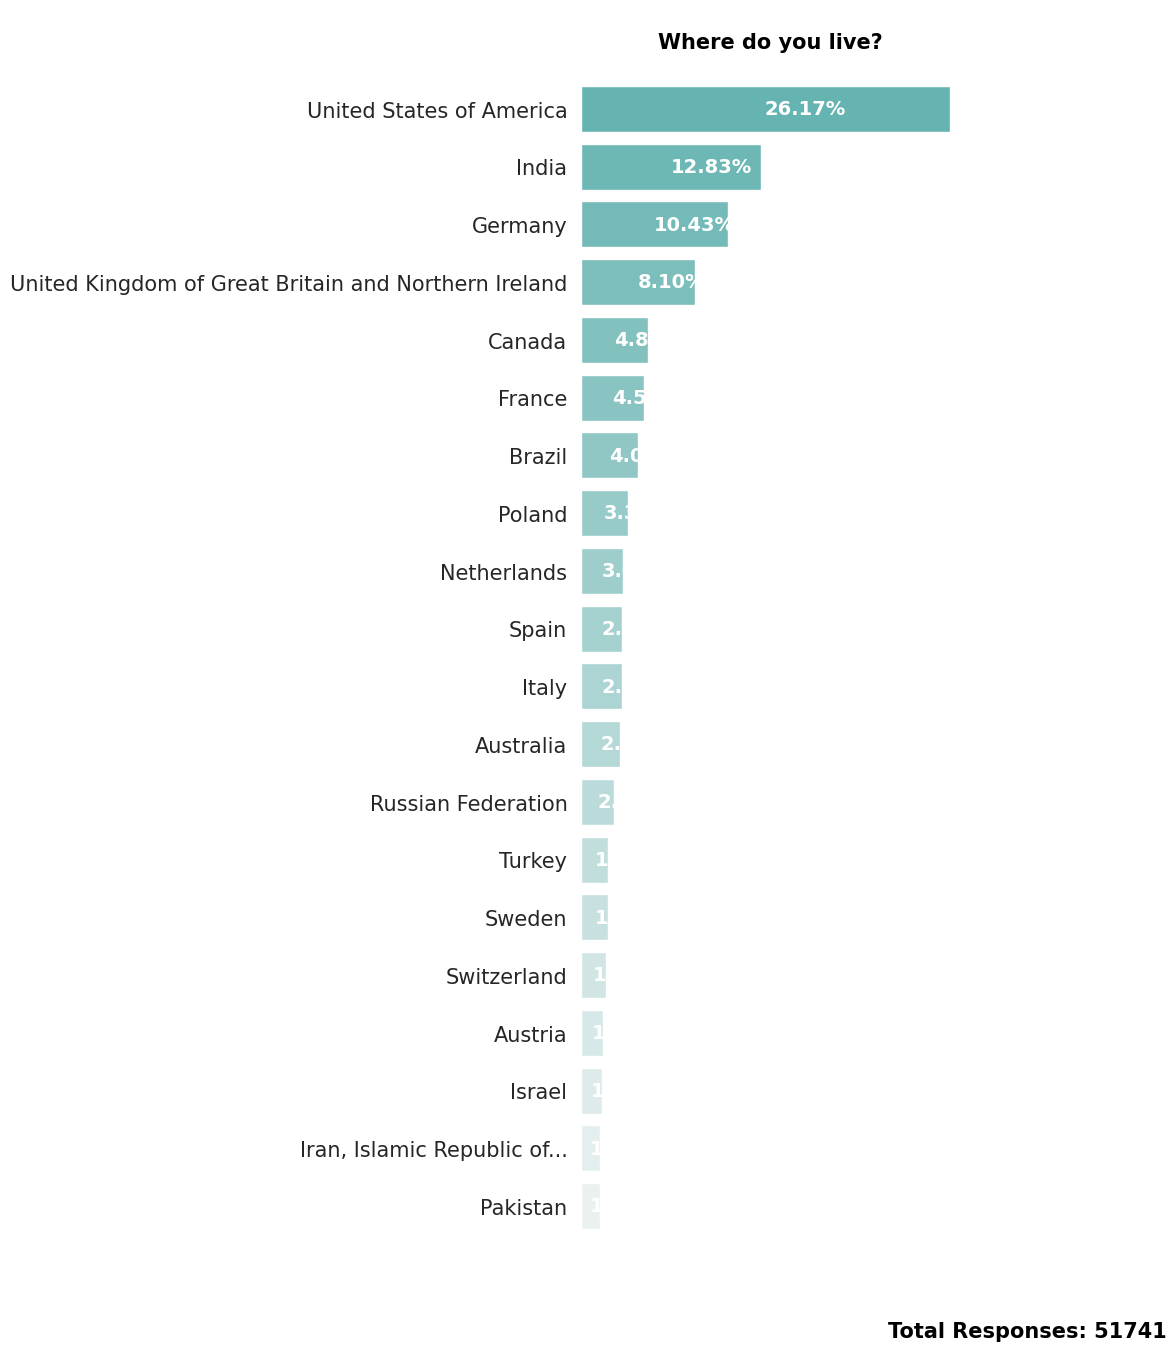

In [41]:
country = survey_df.Country.value_counts()[:20]

custom_plot(country, y_label_font_size=15, 
            title= schema_df.Country.split('<')[0] ) 

---
---

###  Which currency does developer use day-to-day?


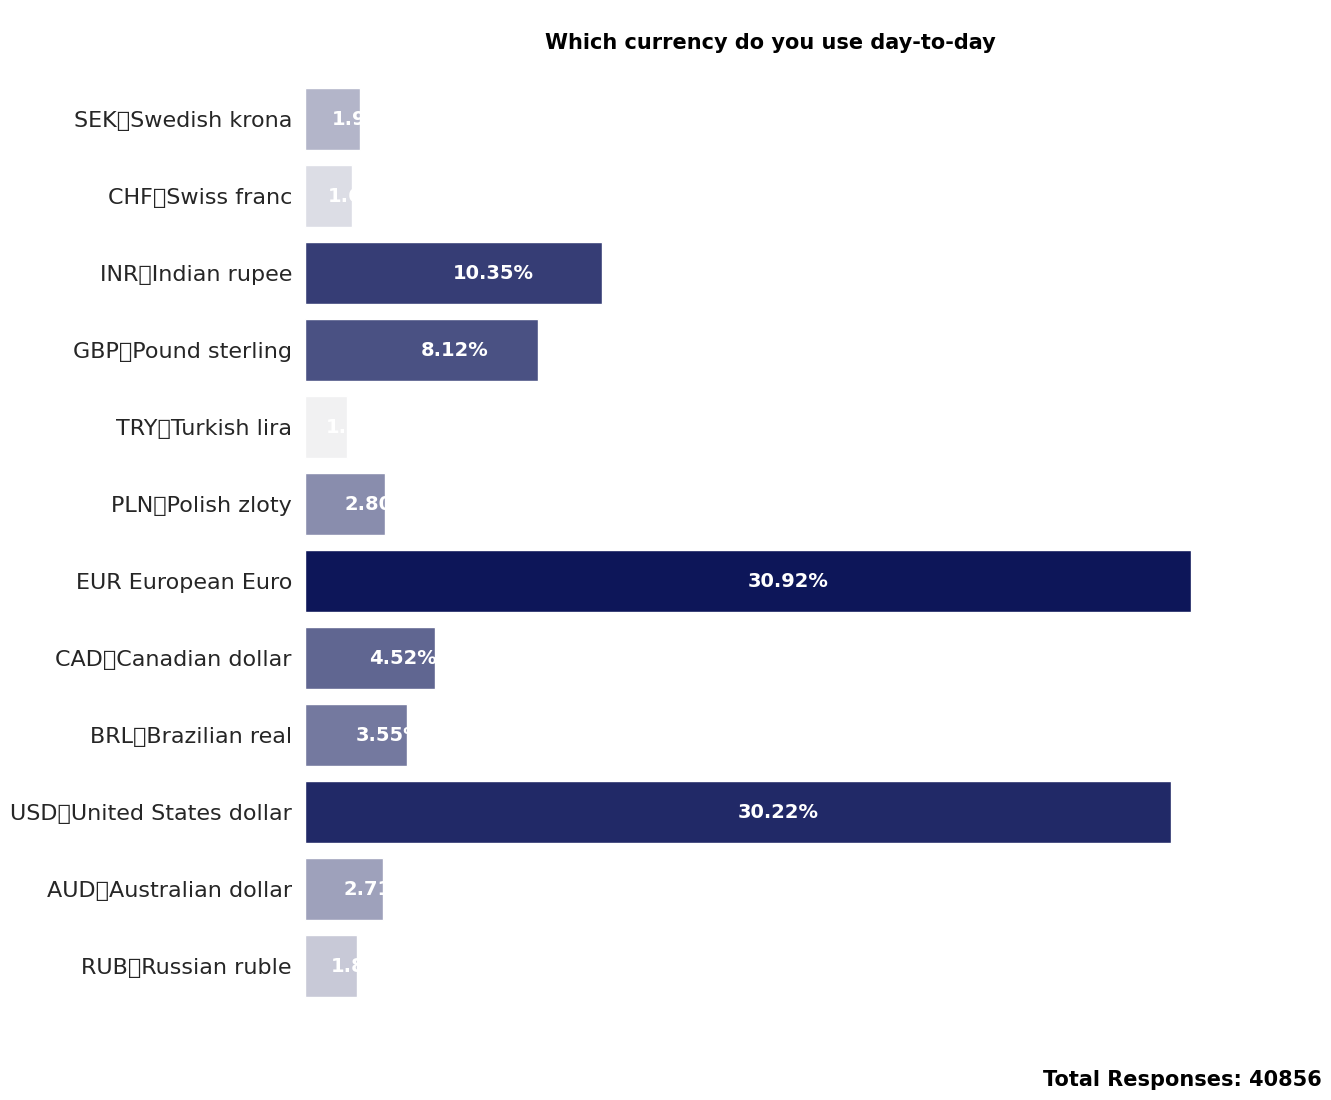

In [52]:
currency = survey_df.Currency.value_counts()[:12]
currency = currency.sample(len(currency))

custom_plot(currency, plot_height=12, plot_width=12,
           color = 'light:#000C66', 
           title=schema_df.Currency.split('?')[0], 
           y_label_font_size=16)

In [50]:
import warnings
warnings.filterwarnings('ignore')

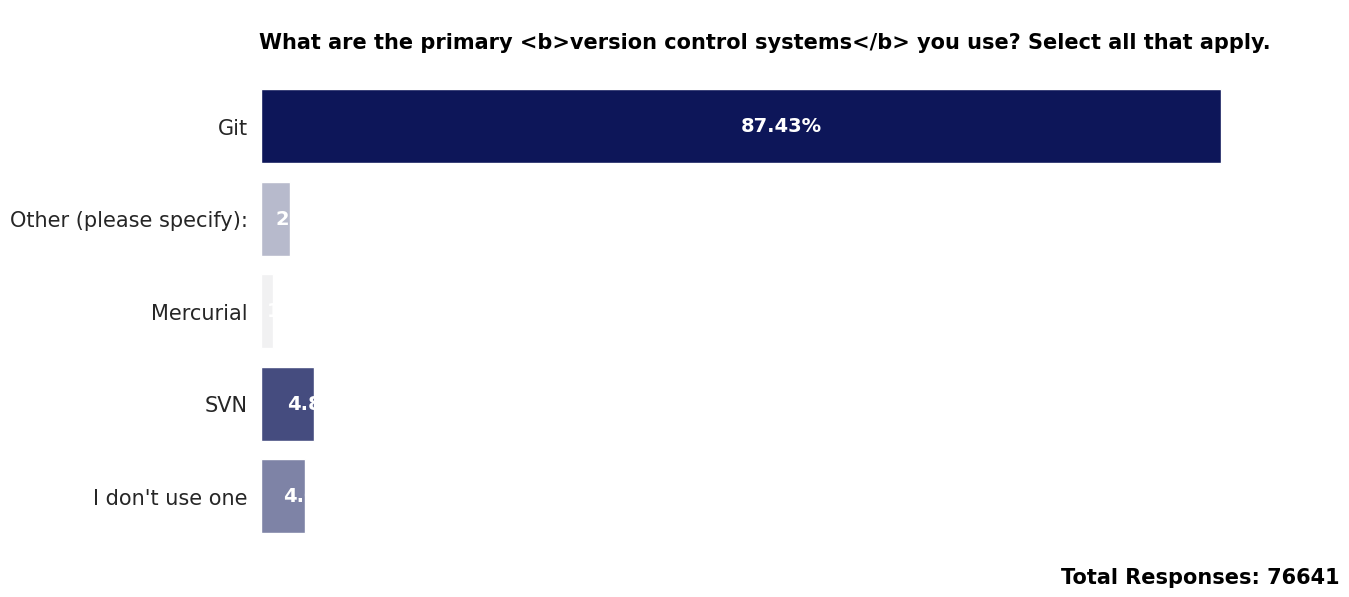

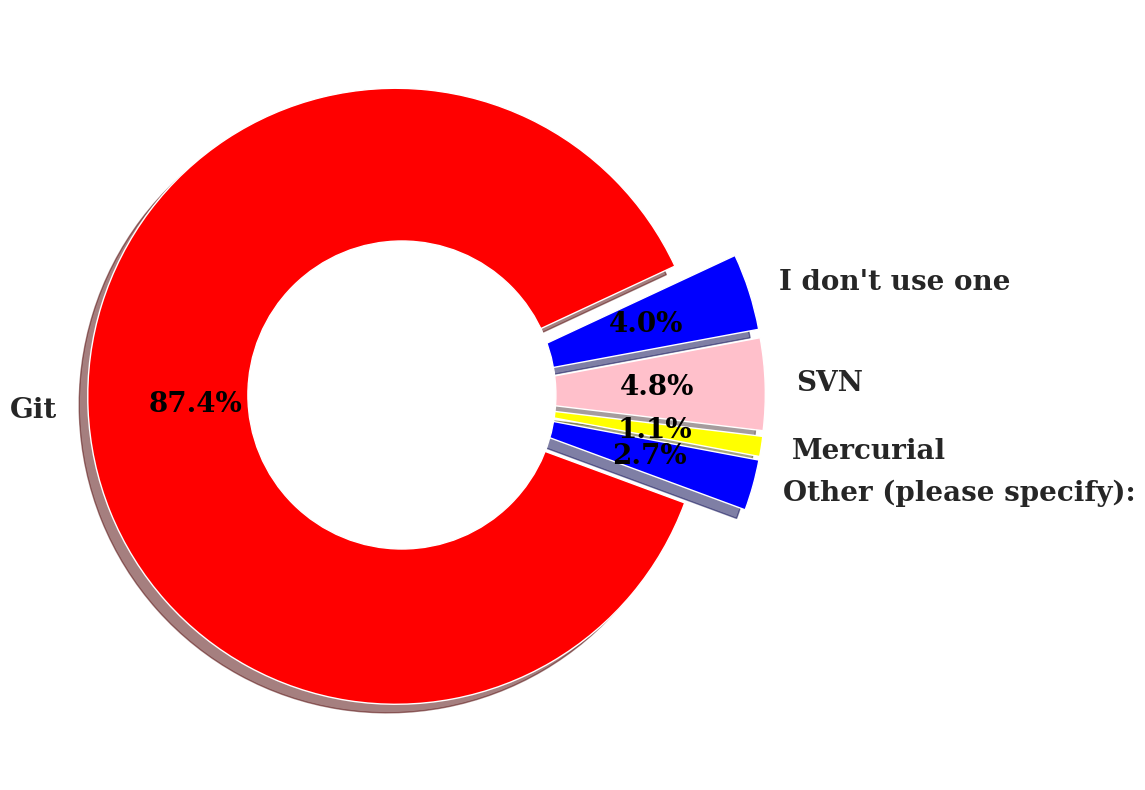

In [25]:
vcs = colum_expand(survey_df.VersionControlSystem)


custom_plot(vcs, plot_height=6, plot_width=13, color = 'light:#000C66',
           y_label_font_size=15, title=schema_df.VersionControlSystem)

plot_pie(vcs, startangle=25,
        distance_btwn_pieces=0.1)


---
---

# what is your gender..?

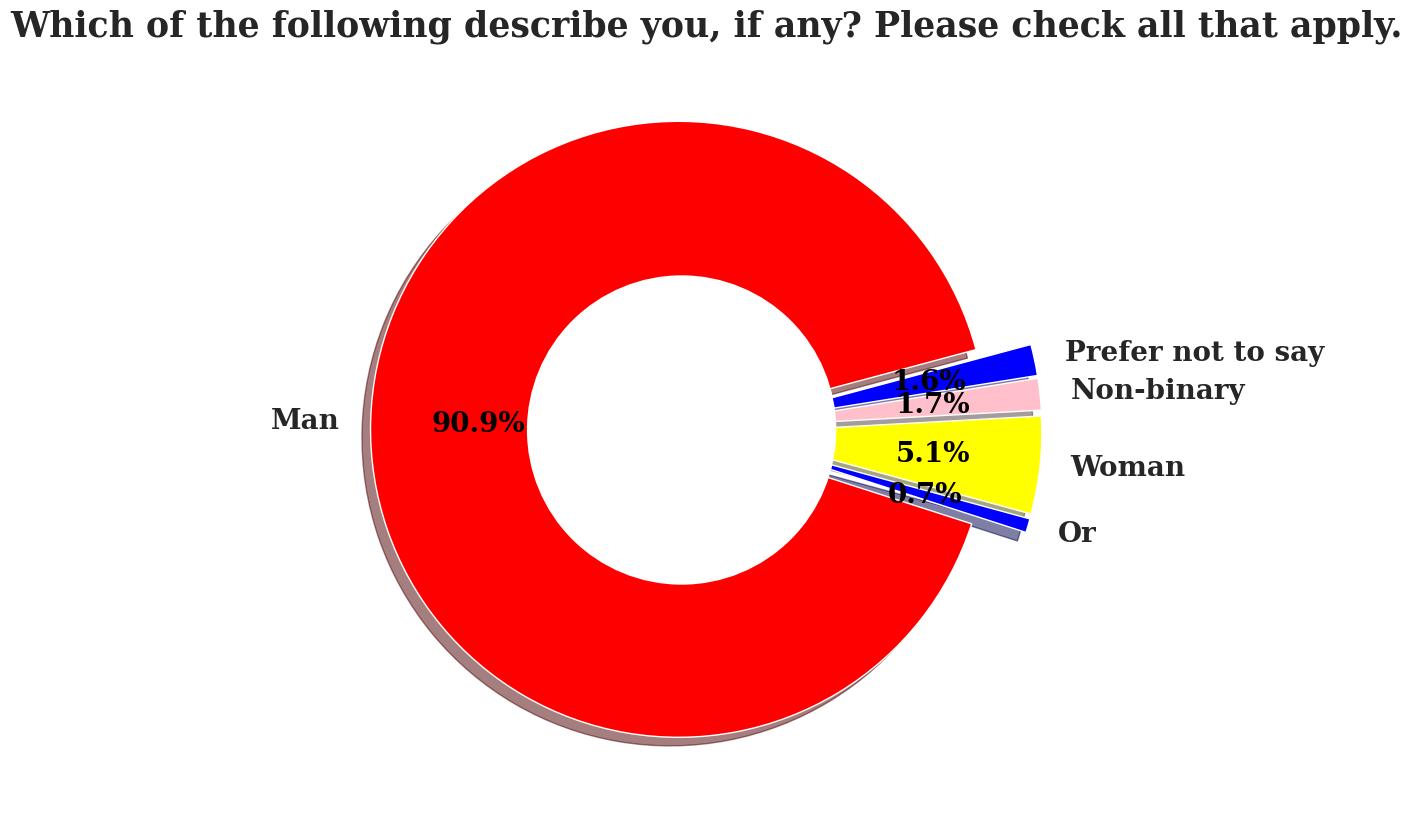

In [109]:
# survey_df.Gender.value_counts()

gender = colum_expand(survey_df.Gender)

gender.rename( lambda x: x.split(',')[0], inplace=True )

plot_pie(gender,distance_btwn_pieces=0.09, startangle=15, 
        title=schema_df.Gender)

---
---
# ethincity of developer

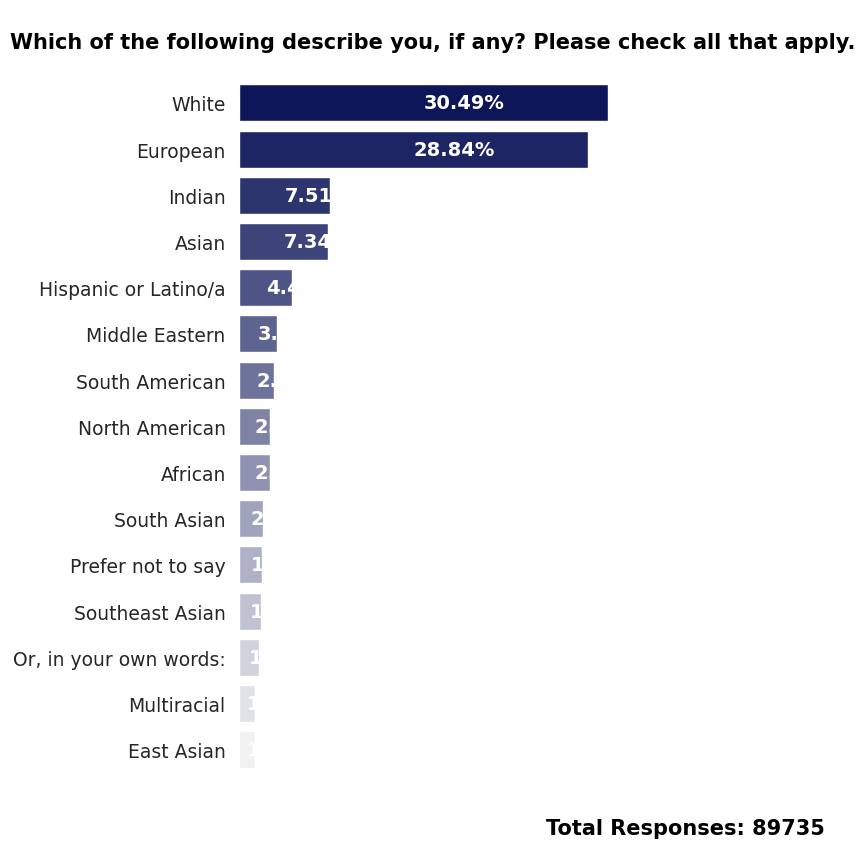

In [120]:
ethincity = colum_expand(survey_df.Ethnicity).nlargest(15)

custom_plot(ethincity, plot_height=9, title=schema_df.Ethnicity, color = 'light:#000C66')

---
---


# How many years of working experience do you have?

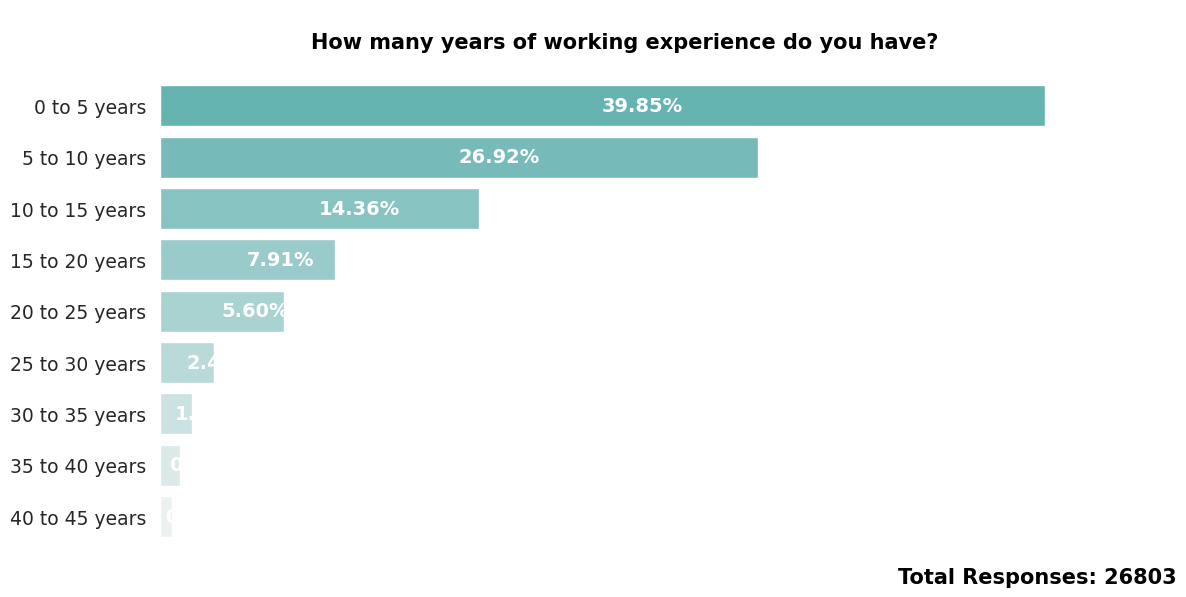

In [29]:
work_exp = survey_df.WorkExp.apply(make_groups).value_counts()


custom_plot(work_exp, plot_height=6, plot_width=12, title=schema_df.WorkExp,)

---
---

# which technologies does your company have?

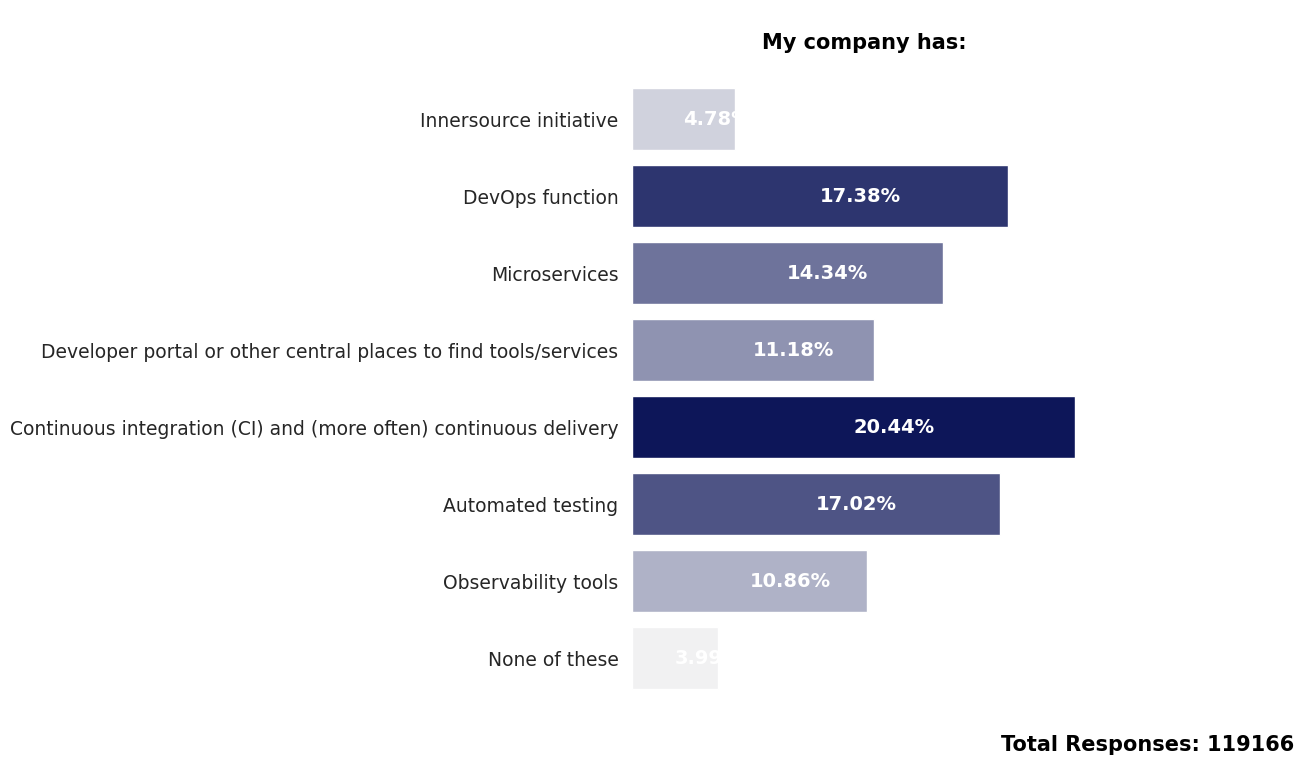

In [149]:
tech = colum_expand(survey_df.ProfessionalTech)

custom_plot(tech, plot_height=8, plot_width=6, color = 'light:#000C66',
           title=schema_df.ProfessionalTech)

In [150]:
schema_df.Language

'Which <b>programming, scripting, and markup languages</b> have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

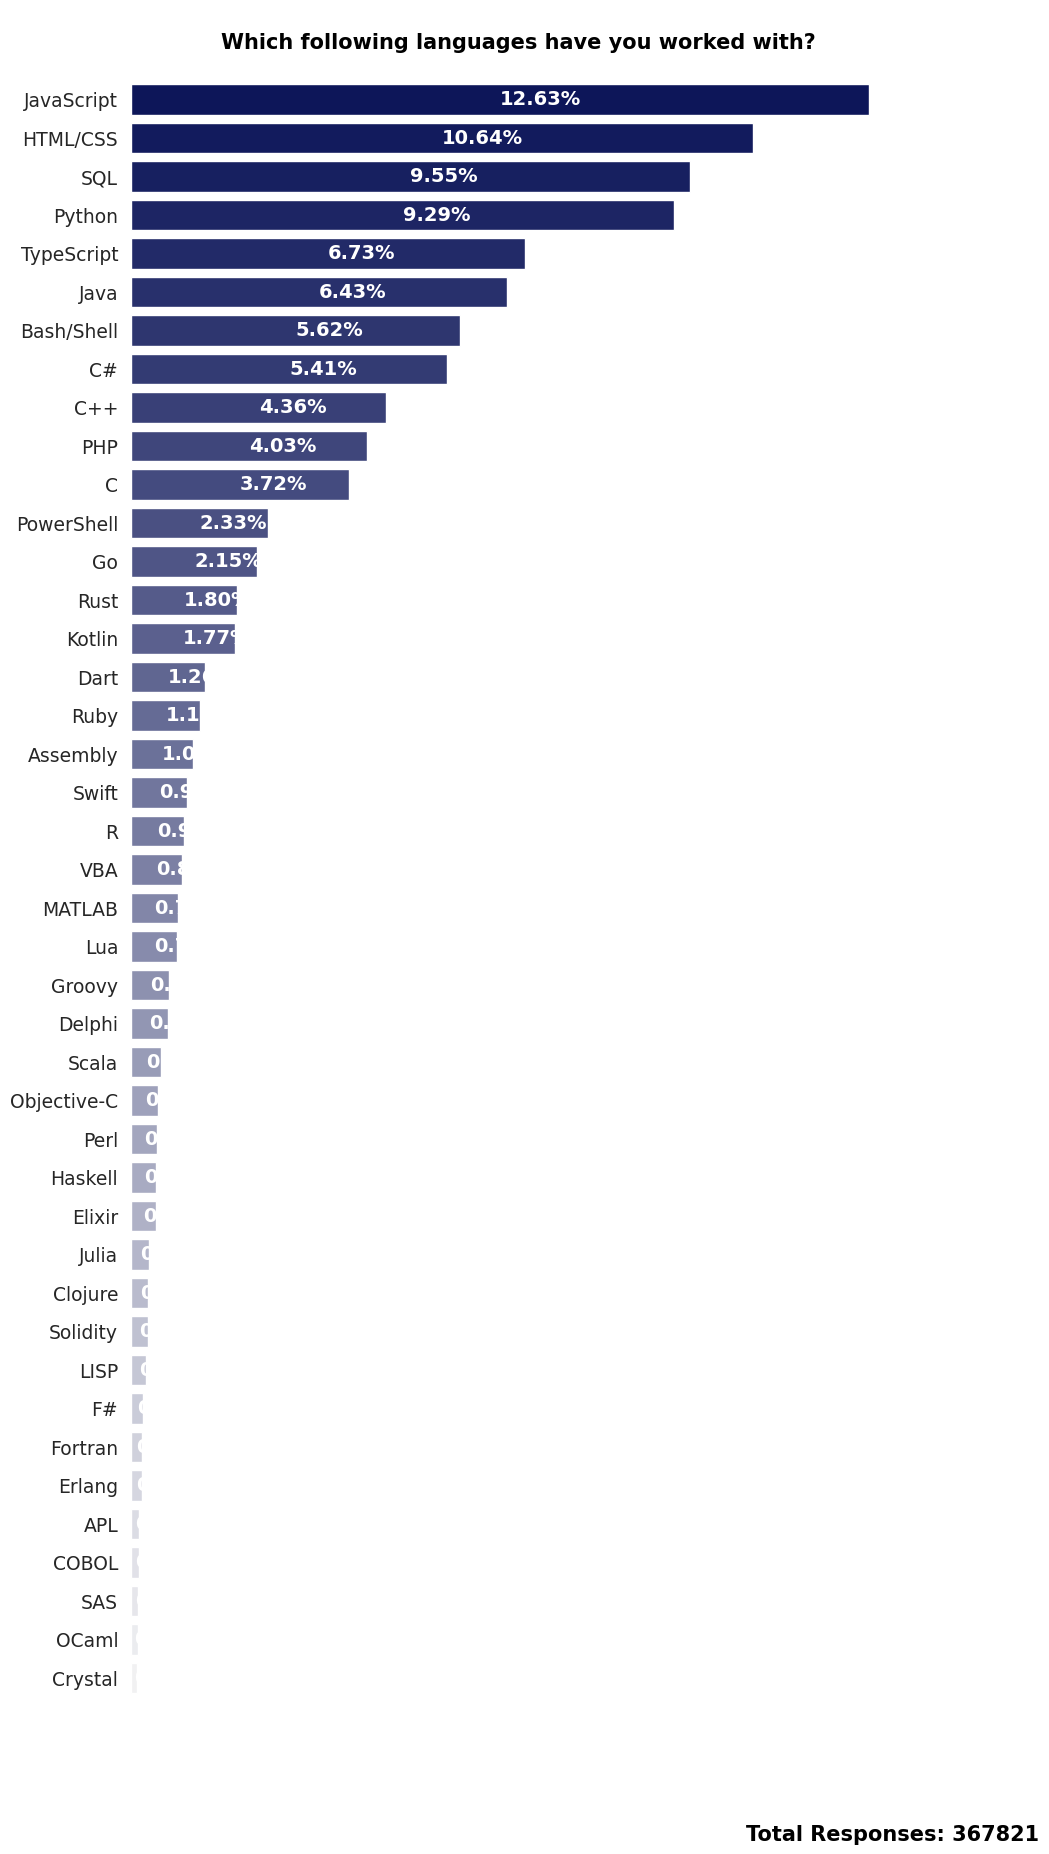

In [163]:
languages = colum_expand(survey_df.LanguageHaveWorkedWith).sort_values(ascending=False)

s = 'Which following languages have you worked with?'

custom_plot(languages, plot_height=21,plot_width=10, title=s,color = 'light:#000C66')

In [165]:
survey_df.WebframeHaveWorkedWith     # django flask
survey_df.WebframeWantToWorkWith

survey_df.LanguageWantToWorkWith

survey_df.DatabaseHaveWorkedWith
survey_df.DatabaseWantToWorkWith

survey_df.PlatformHaveWorkedWith
survey_df.PlatformWantToWorkWith

survey_df.MiscTechHaveWorkedWith
survey_df.MiscTechWantToWorkWith 

survey_df.ToolsTechHaveWorkedWith
survey_df.ToolsTechWantToWorkWith     

survey_df.CompTotal                  # annual income
survey_df['OpSysPersonal use']       # operating system

0             NaN
1             NaN
2         32000.0
3         60000.0
4             NaN
           ...   
73263     60000.0
73264    107000.0
73265         NaN
73266     58500.0
73267         NaN
Name: CompTotal, Length: 73268, dtype: float64

---

<h1><center>E N D</center></h1>

---